
# ML Workflow - Supervised Learning (Regression)

![Image](./img/scikit_learn.png)


In [ ]:
# imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pickle
import joblib

from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

## [Train-Test-Split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

![Image](./img/train_valid_test.JPG)

In [ ]:
# Load datasets

X, y = make_regression(n_samples=1000, n_features=10, random_state=42)
#X, y = datasets.load_diabetes(return_X_y=True)
print(X.shape, y.shape)

(1000, 10) (1000,)


In [ ]:
# Train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")
#print(f"X_train: {type(X_train)}, X_test: {type(X_test)}, y_train: {type(y_train)}, y_test: {type(y_test)}")

X_train: (800, 10), X_test: (200, 10), y_train: (800,), y_test: (200,)


---

## [Model Selection](https://scikit-learn.org/stable/supervised_learning.html)

![Image](./img/ml_map_regression.JPG)

[See full map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

---

### Regression Estimators

- [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

- [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

- [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

- [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

- [SGD Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

- [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

#### todos estos modelos son modelos lineales de regression

pasos:

1 - definimos modelo en una variable

2 - entrenamos el modelo --> .fit(X_train, y_train)

3 - testamos el modelo --> .predict(X_test)

4 - pd.dataframe( y_test, predictions, diff)

In [ ]:
%%time

# Model definition

model = linear_model.Lasso()
#model = ElasticNet()
#model = Ridge()
#model = SVR() #--> este no es lineal
#model = SGDRegressor()
#model = LinearRegression()

hyperparameters = model.get_params() #definimos los parámetros del method() --> hiperparámetro son los parámetros de configuración del modelo

print(type(model), '\n')
print('Model hyperparameters:', hyperparameters, '\n')

<class 'sklearn.linear_model._coordinate_descent.Lasso'> 

Model hyperparameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': 'deprecated', 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False} 

Wall time: 0 ns


In [ ]:
%%time

# Model training

model.fit(X_train, y_train) # aplicamos el modelo a los datos de entrenamiento

print('Model:', model, '\n')
print('Model hyperparameters:', hyperparameters, '\n')
print('Model coefficients:', model.coef_, '\n')

Model: Lasso() 

Model hyperparameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': 'deprecated', 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False} 

Model coefficients: [30.98995196 75.17780503 32.4669539   8.42283248  4.07431736 57.38196722
 28.50219469  6.19206471  9.37994097 74.37814799] 

Wall time: 16.1 ms


In [ ]:
%%time

# Model predictions

predictions = model.predict(X_test) # con los valores entrenados hacemos la prediccion

print(type(predictions))

<class 'numpy.ndarray'>
Wall time: 1 ms


In [ ]:
# Visual check

check = pd.DataFrame({'Ground truth':y_test, 'Predictions':predictions, 'Diff':y_test-predictions})
check

,Ground truth,Predictions,Diff
0,-126.828297,-122.089497,-4.738800
1,-0.375609,1.794570,-2.170179
2,106.370663,106.271388,0.099274
3,-107.680882,-104.203475,-3.477406
4,39.309848,36.544075,2.765773
...,...,...,...
195,88.802292,86.238209,2.564083
196,180.096858,176.811210,3.285649
197,69.902165,68.621445,1.280719
198,-125.244359,-119.185921,-6.058438


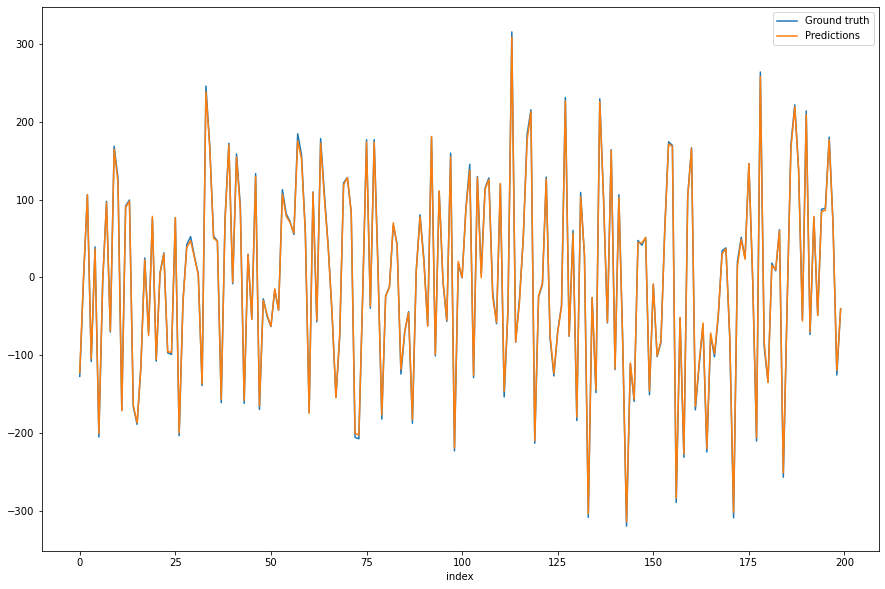

In [ ]:
check.reset_index(inplace=True)

check.plot(x='index', y=['Ground truth', 'Predictions'], kind='line', figsize=(15, 10));

---

### Model persistence

- __pickle.__ Serialize your machine learning algorithms and save (and later load) the serialized format to a file.

- __joblib.__ Saving and loading Python objects that make use of NumPy data structures, efficiently. Better options for machine learning algorithms that require a lot of parameters or store the entire dataset (like K-Nearest Neighbors).

In [ ]:
# Save model using pickle

filename = './models/linearregression_001.sav'
pickle.dump(model, open(filename, 'wb'))
print('Your model has been saved with  pickle!!!')

Your model has been saved with  pickle!!!


In [ ]:
# Load model using pickle

filename = './models/linearregression_001.sav'
loaded_model = pickle.load(open(filename, 'rb'))
print('Model coefficients:', model.coef_, '\n')
print('Loaded model coefficients:', loaded_model.coef_)

Model coefficients: [30.98995196 75.17780503 32.4669539   8.42283248  4.07431736 57.38196722
 28.50219469  6.19206471  9.37994097 74.37814799] 

Loaded model coefficients: [30.98995196 75.17780503 32.4669539   8.42283248  4.07431736 57.38196722
 28.50219469  6.19206471  9.37994097 74.37814799]


In [ ]:
# Save model using joblib

filename = './models/linearregression_002.sav'
joblib.dump(model, filename)
print('Your model has been saved with joblib!!!')

Your model has been saved with joblib!!!


In [ ]:
# Load model using joblib

filename = './models/linearregression_002.sav'
loaded_model = joblib.load(filename)
print('Model coefficients:', model.coef_, '\n')
print('Loaded model coefficients:', loaded_model.coef_)

Model coefficients: [30.98995196 75.17780503 32.4669539   8.42283248  4.07431736 57.38196722
 28.50219469  6.19206471  9.37994097 74.37814799] 

Loaded model coefficients: [30.98995196 75.17780503 32.4669539   8.42283248  4.07431736 57.38196722
 28.50219469  6.19206471  9.37994097 74.37814799]
